CArgamso las librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs # dataset

In [4]:
data = make_blobs(n_samples= 200, n_features= 2, centers= 4, cluster_std= 1.8, random_state= 101) # n_samples= numero de ejemplos, n_features= variables, centers= centros, cluster_std=desviacion estandar, random_state= 101

In [6]:
data[0].shape

(200, 2)

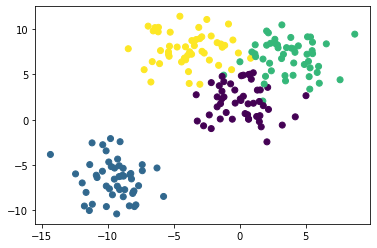

In [8]:
plt.scatter(data[0][:,0],data[0][:,1],c = data[1])

In [10]:
from sklearn.cluster import KMeans #cargamso el modelo

In [11]:
kmeans = KMeans(n_clusters=4) # instanciamos e indicamso que tenemso 4 clustersegun la imagen

In [12]:
kmeans.fit(data[0]) # creamos el fit con fdata[0] == features

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.cluster_centers_ # ver los centros

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664]])

In [14]:
kmeans.labels_ # lo que ah decidido qeu va autilizar ocmo grupos

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 3, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 3], dtype=int32)

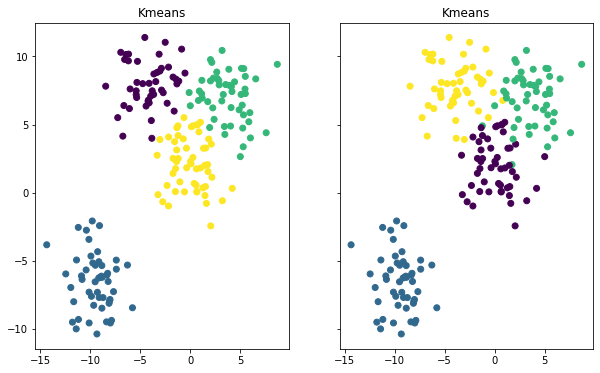

In [15]:
#ploteamos
fig, (ax1,ax2) = plt.subplots(1,2, sharey= True, figsize= (10,6))
ax1.set_title('Kmeans')
ax1.scatter(data[0][:,0],data[0][:,1],c = kmeans.labels_)

ax2.set_title('Kmeans')
ax2.scatter(data[0][:,0],data[0][:,1],c = data[1])



Vamso a crear el codo para poder escoger la mejor K

In [16]:
suma_de_errores_cuadrador = [] # creamos la lsita vacia

K = range(1,15) # K va a tomar el rango de 1 a 15
for k in K:
  km = KMeans(n_clusters= k) # colocamos el valor de ka en el cluster
  km = km.fit(data[0]) # hacemos el fit con data[0]
  suma_de_errores_cuadrador.append(km.inertia_) # sacamos la inercia

In [17]:
suma_de_errores_cuadrador # resultado

[12633.993683268436,
 3799.1629099413412,
 2288.056530389742,
 1318.4035725547487,
 1133.2102712291314,
 994.4722184503264,
 885.8341192463711,
 751.4945338100623,
 687.302498700848,
 608.6915690159419,
 550.2621616036071,
 501.7347936036359,
 467.18356867747576,
 412.0698811238367]

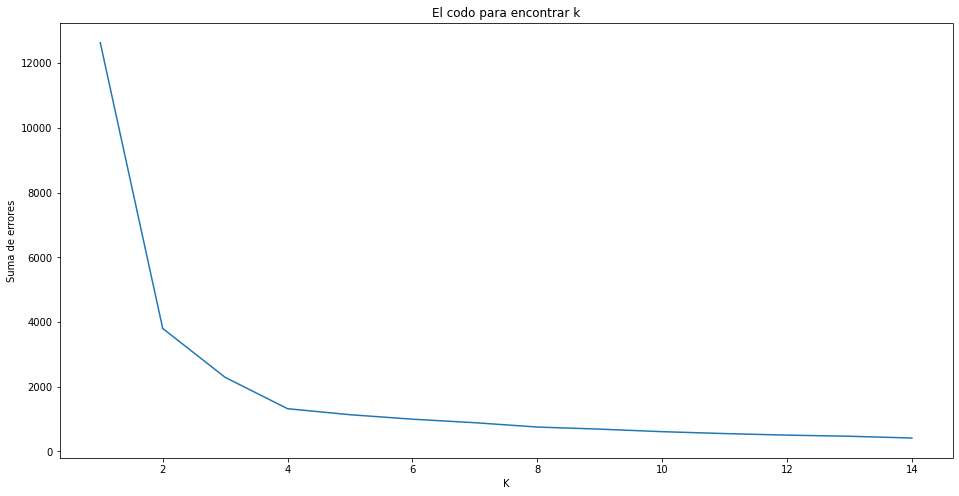

In [18]:
plt.figure(figsize= (16,8))
plt.plot(K,suma_de_errores_cuadrador)
plt.xlabel('K')
plt.ylabel('Suma de errores')
plt.title('El codo para encontrar k')
plt.show()

En el codo se ve que el mejr valor es el 4, que el es que se tomo como valor en el cluster